##**Notebook PC#09 - Part 2**
## Autoencoder training and manifold visualization for the MNIST database.
## Code produced by previous students of IA353. Thank you for making PC#09 (Part 2) still more complete and informative.

**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Beatriz Akiria de Assis Quaresma - 203899 <br>
**Aluno(a):** Decio Miranda Filho - 236087

### Loading the main libraries

In [ ]:
import tensorflow as tf
import os

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.keras import TqdmCallback

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Input, Conv2DTranspose, Reshape
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
import tensorflow as tf

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

### Reading the data

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.
X = x_train.reshape((x_train.shape[0], -1))

### Convolutional Autoencoder

The dense layers of Part 1 were replaced by convolutional layers, which promotes a reduction in the total number of adjustable weights.

In [ ]:
encoder = tf.keras.models.Sequential([
    Conv2D(8, (3, 3), activation='selu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(16, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(64, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(128, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(256, (3, 3), activation='selu', padding='same'),
    Flatten(),
    Dense(2),

], name='encoder')

# Define the decoder
decoder = tf.keras.models.Sequential([
    Dense(256, activation='relu'),
    Reshape((1, 1, 256)),
    Conv2DTranspose(128, (3, 3), strides=(2, 2), activation='selu'),
    Conv2DTranspose(64, (3, 3), strides=(2, 2), activation='selu'),
    Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='selu'),
    Conv2DTranspose(16, (3, 3), strides=(2, 2), padding='same', activation='selu'),
    Conv2D(8, (3, 3), padding='same', activation='selu'),
    Conv2D(1, (3, 3), padding='same', activation=None),
], name='decoder')

autoencoder = Sequential([encoder, decoder])
autoencoder.summary(expand_nested=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Sequential)        (None, 2)                 393922    
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| conv2d (Conv2D)            (None, 28, 28, 8)         80       |
|                                                               |
| max_pooling2d (MaxPooling  (None, 14, 14, 8)         0        |
| 2D)                                                           |
|                                                               |
| conv2d_1 (Conv2D)          (None, 14, 14, 16)        1168     |
|                                                               |
| max_pooling2d_1 (MaxPooli  (None, 7, 7, 16)          0        |
| ng2D)                                                         |
|                                                               |
| conv2d_2 (Conv2D)          (None, 7, 7, 32)          4

In [ ]:
autoencoder.compile(optimizer = "adam", loss = "mse")

history = autoencoder.fit(x_train.reshape((-1, 28, 28, 1)), x_train.reshape((-1, 28, 28, 1)), batch_size = 128, epochs = 20, verbose = 0, callbacks=[TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

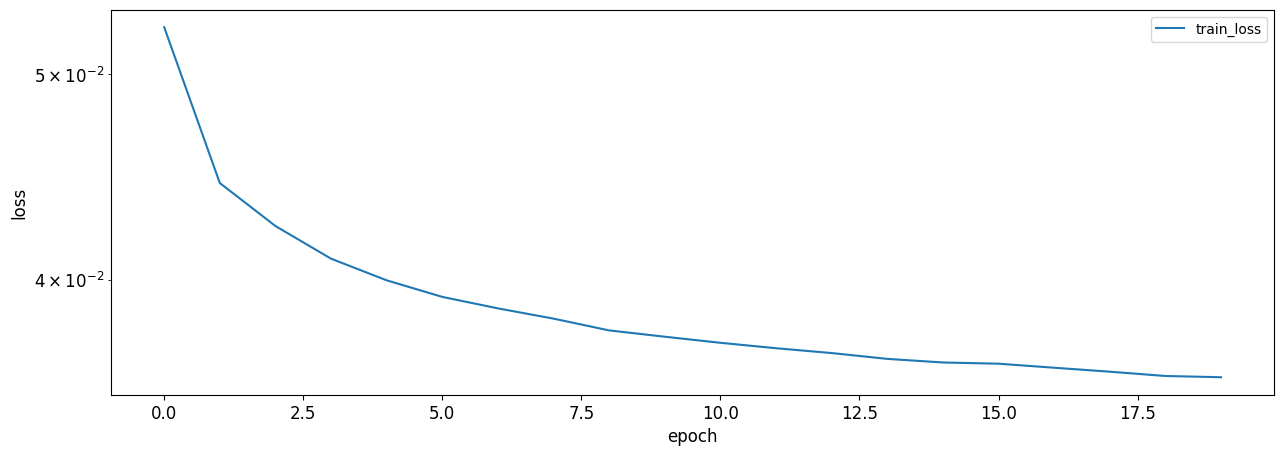

In [ ]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss']})
plot_df.plot(logy=True, figsize=(15,5), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

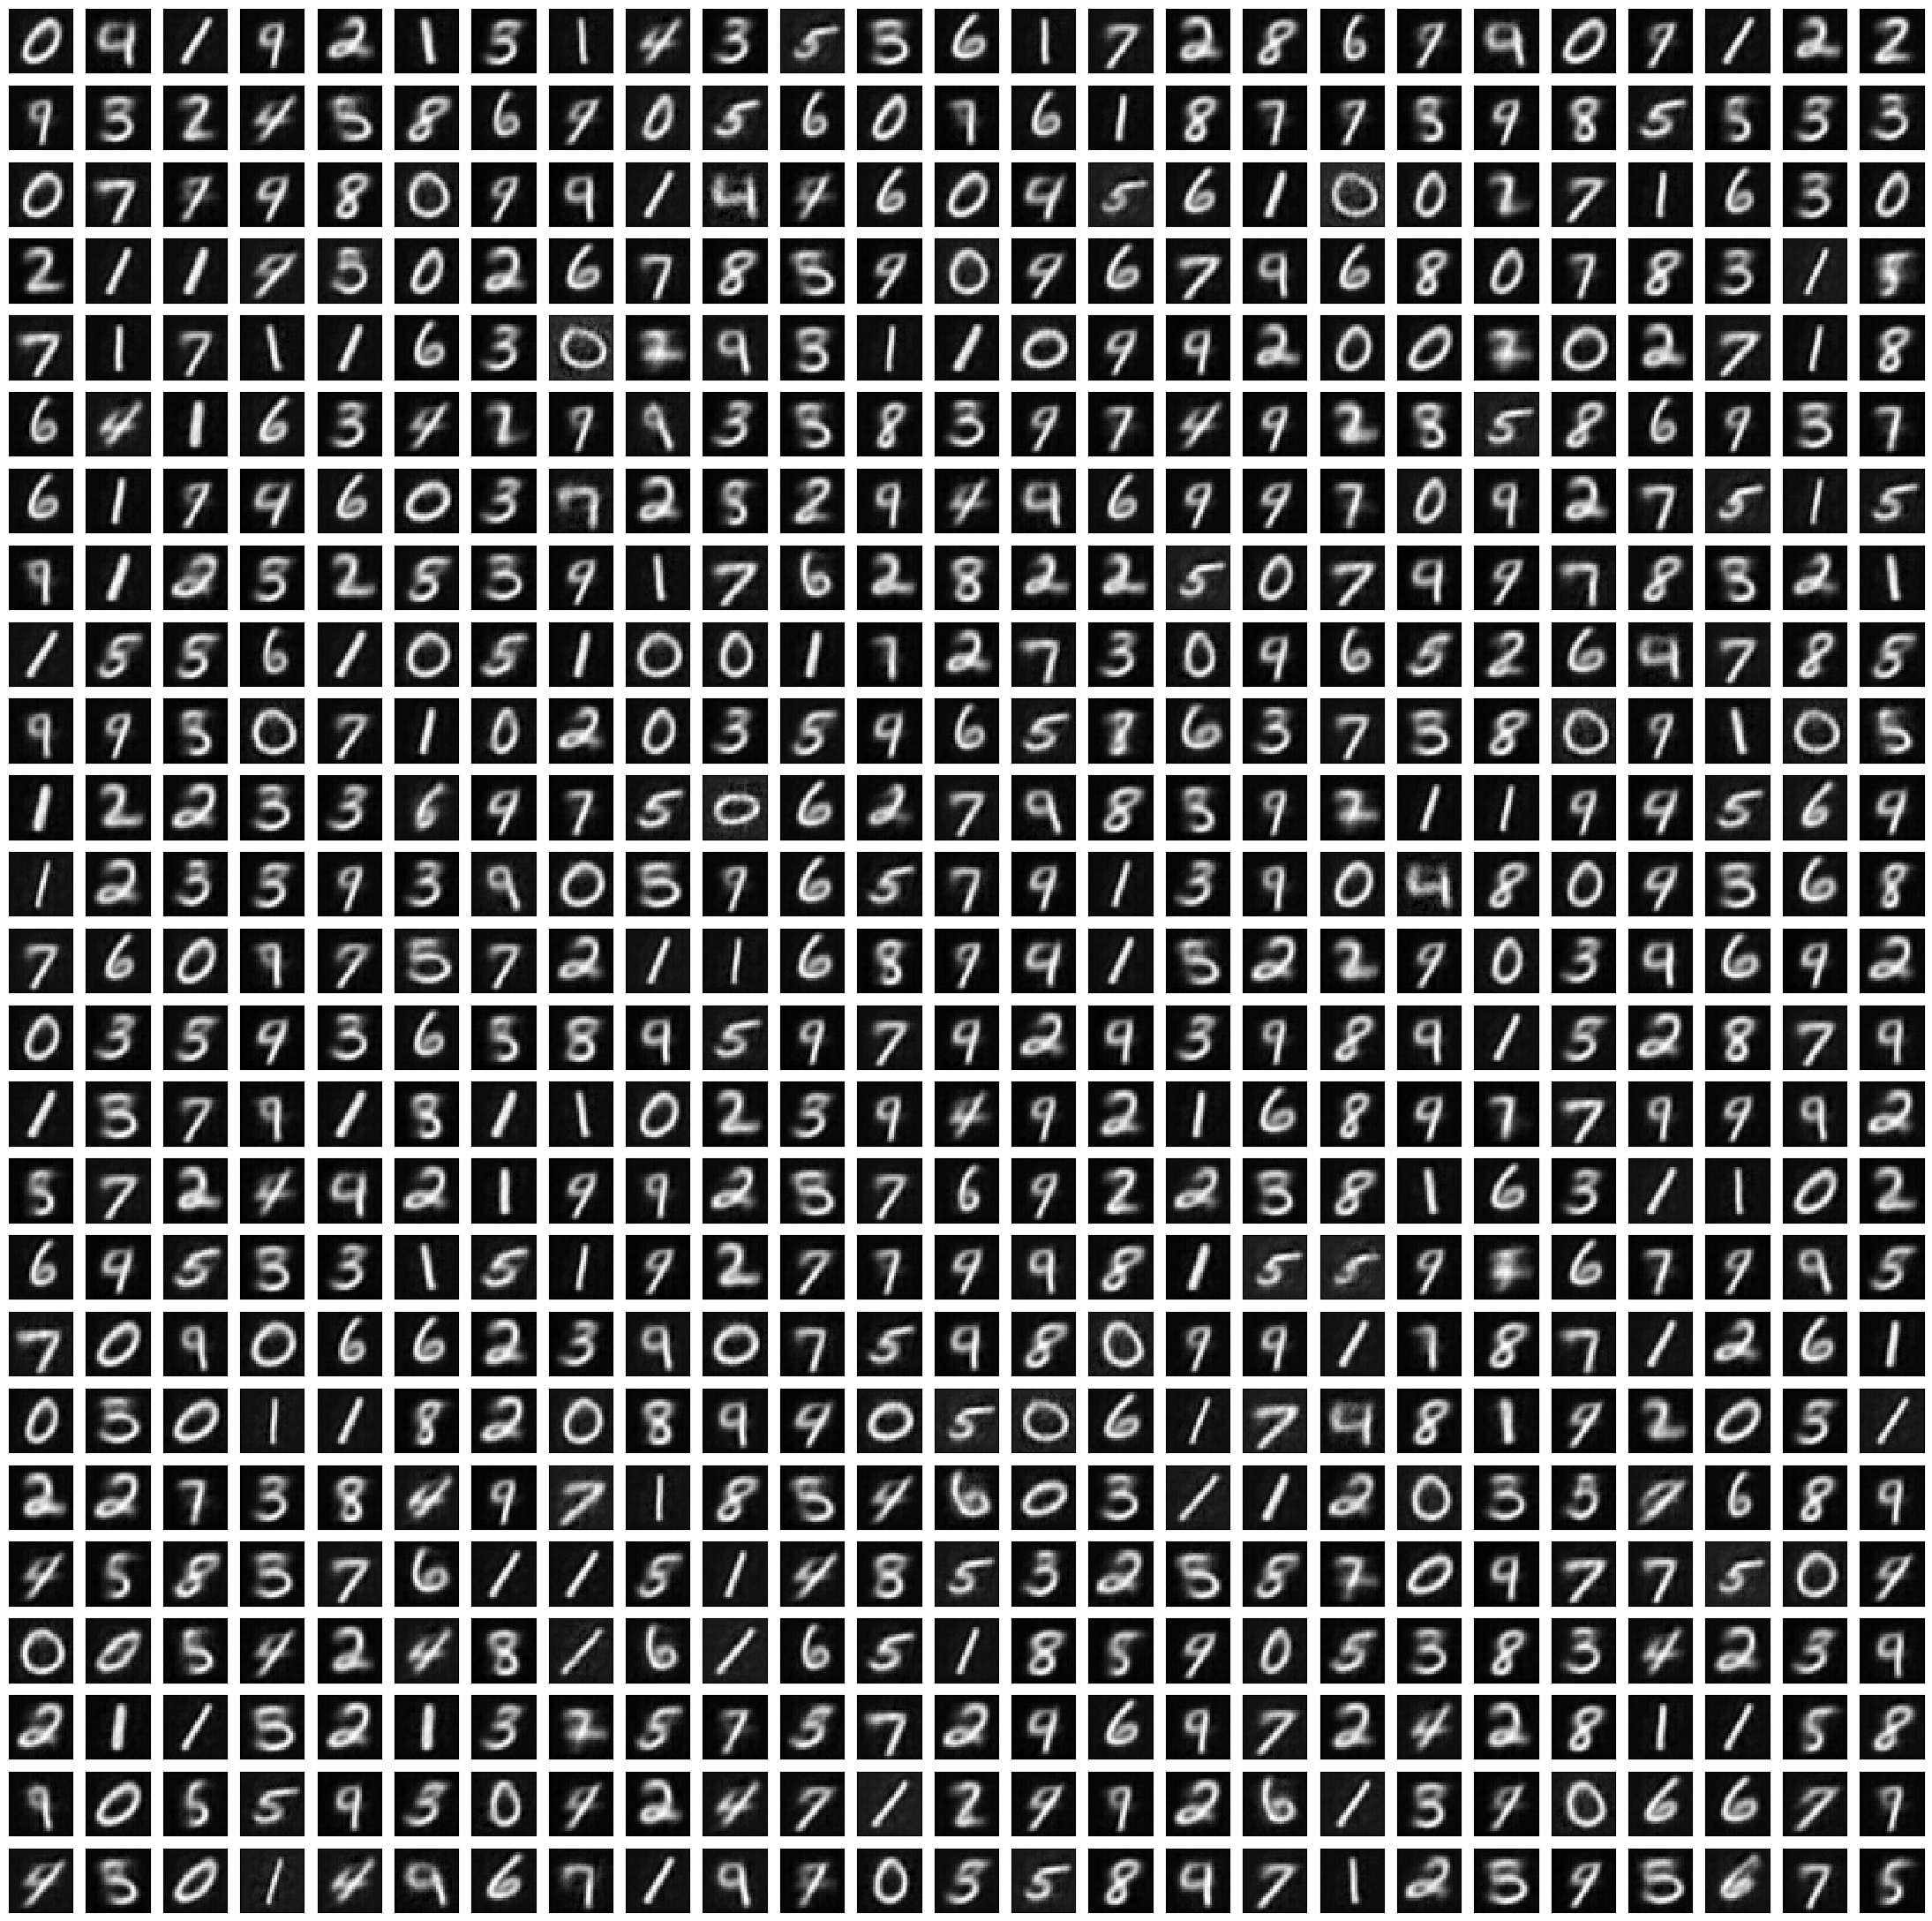

In [ ]:
fig = plt.figure(figsize=(28,28))

decoded_images = autoencoder.predict(X[:26*26].reshape((-1, 28, 28, 1)), verbose=False)

ind = 1
for i in range(1, 26, 1):
    for j in range(1, 26, 1):
        fig.add_subplot(25, 25, ind)
        plt.imshow(decoded_images[ind].reshape((28,28)), cmap = "gray", interpolation = "none")
        plt.xticks([])
        plt.yticks([])
        ind+=1

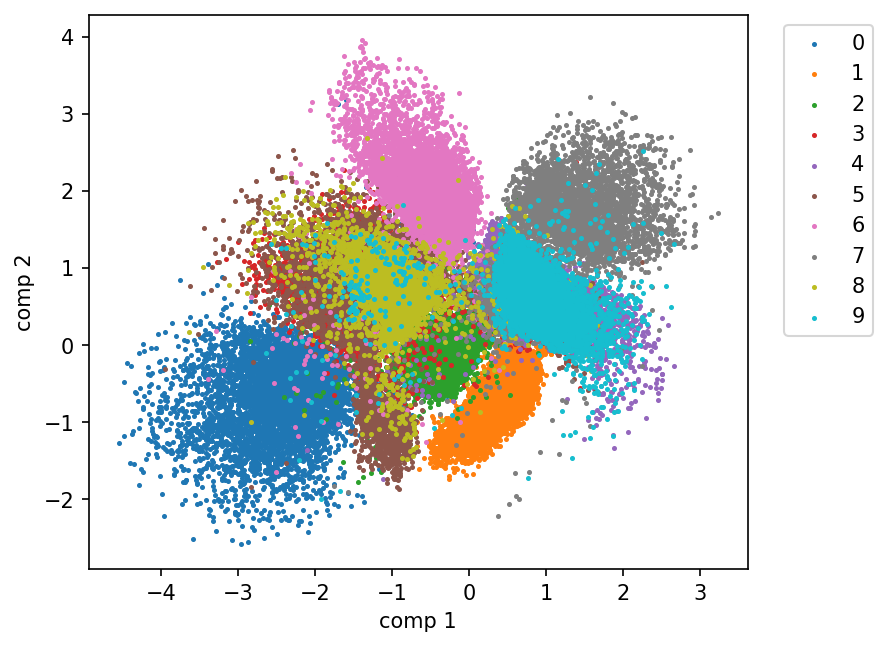

In [ ]:
fig, ax = plt.subplots(dpi=150)

x_proj = encoder.predict(X.reshape((-1, 28, 28, 1)), verbose=0)

for i in range(10):
    ax.scatter(*x_proj[y_train == i].T, label=i, s=2)


ax.legend(bbox_to_anchor=(1.04, 1))
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_aspect('equal', 'box')

plt.show()

<font color="green">
Atividade (a) <br>
Compare a disposição dos códigos de dígitos das 10 classes com aquela da Parte 1. Procure justificar a diferença nos resultados.
</font>

**Resposta:**

* **Parte 1:** Utilizou-se um autoencoder com camadas densas para reduzir a dimensionalidade das imagens e projetá-las no espaço latente bidimensional. No gráfico de disposição dos códigos de dígitos das 10 classes observamos que dados da mesma classe estavam próximos, exceto por alguns *outliers*, porém, a separação entre as classes no espaço latente foi baixa, com muitas classes se sobrepondo.


* **Parte 2:** Substituiu-se as camadas densas por camadas convolucionais no autoencoder. Observamos que a projeção dos códigos de dígitos no espaço latente bidimensional mostrou uma separação mais clara e distinta entre as classes de dígitos, apesar de ainda possuir algumas classes sobrepostas.


O motivo para essa diferença está na escola das camadas do autoenconder. Enquanto as camadas densas tratam os pixels de forma independente, sem levar em consideração a proximidade espacial ou de padrões locais e detalhes finos, as camadas convolucionais capturam características espaciais e padrões locais de maneira mais eficaz (utilizando o *pooling*). Isso se traduz em uma representação latente mais discriminativa e preservadora de informações relevantes nos dados. Além disso, as camadas convolucionais oferecem uma redução significativa no número de parâmetros, tornando os modelos mais eficientes e menos propensos ao *overfitting*.


In [ ]:
def circle_path(radius, center, n_images, ax, *args, **kwargs):
    x0, y0 = center

    pts = np.zeros((n_images, 2))
    pts[:, 0] = radius * np.cos(2 * np.pi * np.linspace(1, n_images, num=n_images)/n_images) + x0
    pts[:, 1] = radius * np.sin(2 * np.pi * np.linspace(1, n_images, num=n_images)/n_images) + y0

    path = decoder.predict(pts, verbose=0).reshape((-1, 28, 28))

    for i in range(n_images):
        ax.add_artist(AnnotationBbox(OffsetImage(path[i], cmap='binary_r', zoom=0.4), pts[i], frameon=False))

In [ ]:
def clear_artists(ax):
    for artist in ax.artists:
        artist.remove()

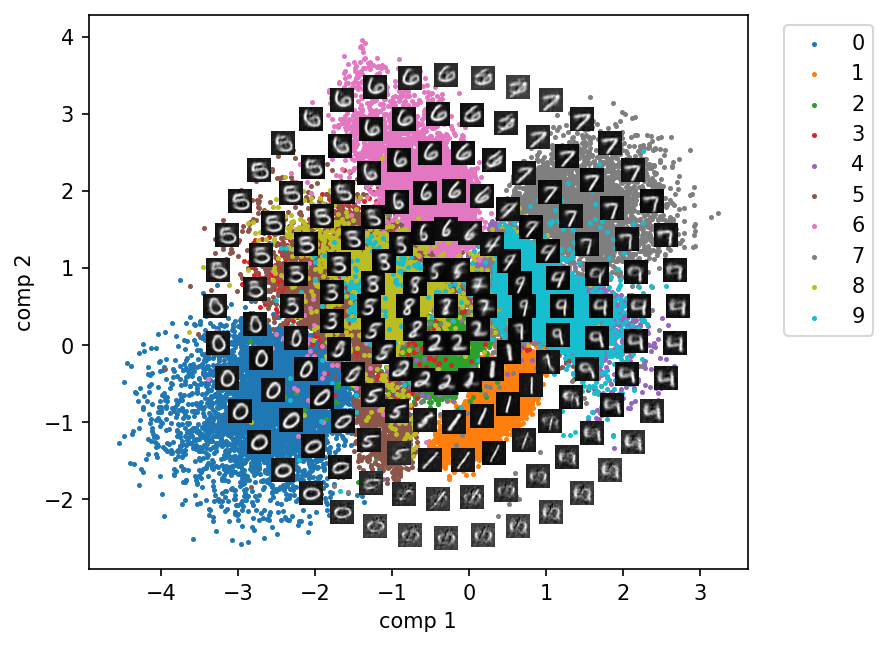

In [ ]:
clear_artists(ax)

circle_path(radius=3, center=(-0.3,0.5), n_images=40, ax=ax)
circle_path(radius=2.5, center=(-0.3,0.5), n_images=35, ax=ax)
circle_path(radius=2, center=(-0.3,0.5), n_images=30, ax=ax)
circle_path(radius=1.5, center=(-0.3,0.5), n_images=25, ax=ax)
circle_path(radius=1, center=(-0.3,0.5), n_images=20, ax=ax)
circle_path(radius=0.5, center=(-0.3,0.5), n_images=10, ax=ax)
circle_path(radius=0, center=(-0.3,0.5), n_images=1, ax=ax)

fig

<font color="green">
Atividade (b) <br>
Se necessário, redefina os valores de [center], [radius] e [n_images] para que as amostras excursionem por toda a distribuição de códigos. Em outras palavras, não deixe nenhuma região colorida sem amostras.
</font>

### Pre-trained convolutional autoencoder

The idea here is to force the encoder to separate the data before the decoder tries to decode the latent space. To do this, we will pre-train the encoder as a classifier, in a supervised manner. After this encoder pre-training, we will pre-train the decoder to decode in this latent space learned by the classifier, freezing the encoder weights. The decoder will present low performance in this pre-training stage, given that the encoder is not flexible. Finally, to improve overall performance, we will fine-tune the entire autoencoder.

In [ ]:
encoder = tf.keras.models.Sequential([
    Conv2D(8, (3, 3), activation='selu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(16, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(64, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(128, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(256, (3, 3), activation='selu', padding='same'),
    Flatten(),
    Dense(2),

], name='encoder')

# Define the decoder
decoder = tf.keras.models.Sequential([
    Dense(256, activation='relu', input_shape=(2,)),
    Reshape((1, 1, 256)),
    Conv2DTranspose(128, (3, 3), strides=(2, 2), activation='selu'),
    Conv2DTranspose(64, (3, 3), strides=(2, 2), activation='selu'),
    Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='selu'),
    Conv2DTranspose(16, (3, 3), strides=(2, 2), padding='same', activation='selu'),
    Conv2D(8, (3, 3), padding='same', activation='selu'),
    Conv2D(1, (3, 3), padding='same', activation=None),
], name='decoder')

In [ ]:
pre_train_encoder = Sequential([encoder, Dense(10, 'softmax')])

pre_train_encoder.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

history = pre_train_encoder.fit(X.reshape((-1, 28, 28, 1)), y_train, batch_size = 128, epochs = 20, verbose = 0, callbacks=[TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [ ]:
pre_train_decoder = Sequential([decoder])

x_proj = encoder.predict(X.reshape((-1, 28, 28, 1)), verbose=0)

pre_train_decoder.compile(optimizer='adam', loss='mse')

history = pre_train_decoder.fit(x_proj, X.reshape((-1, 28, 28, 1)), batch_size = 128, epochs = 20, verbose = 0, callbacks=[TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [ ]:
autoencoder = Sequential([encoder, decoder])

autoencoder.compile(optimizer = Adam(learning_rate=1e-10), loss='mse')

history = autoencoder.fit(X.reshape((-1, 28, 28, 1)), X.reshape((-1, 28, 28, 1)), batch_size = 128, epochs = 50, verbose = 0, callbacks=[TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

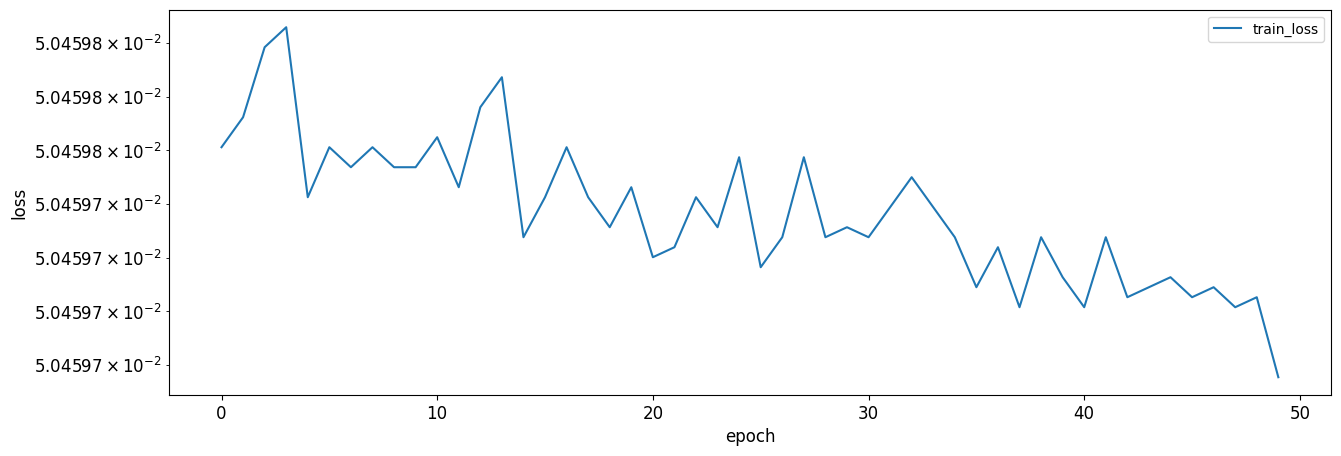

In [ ]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss']})
plot_df.plot(logy=True, figsize=(15,5), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

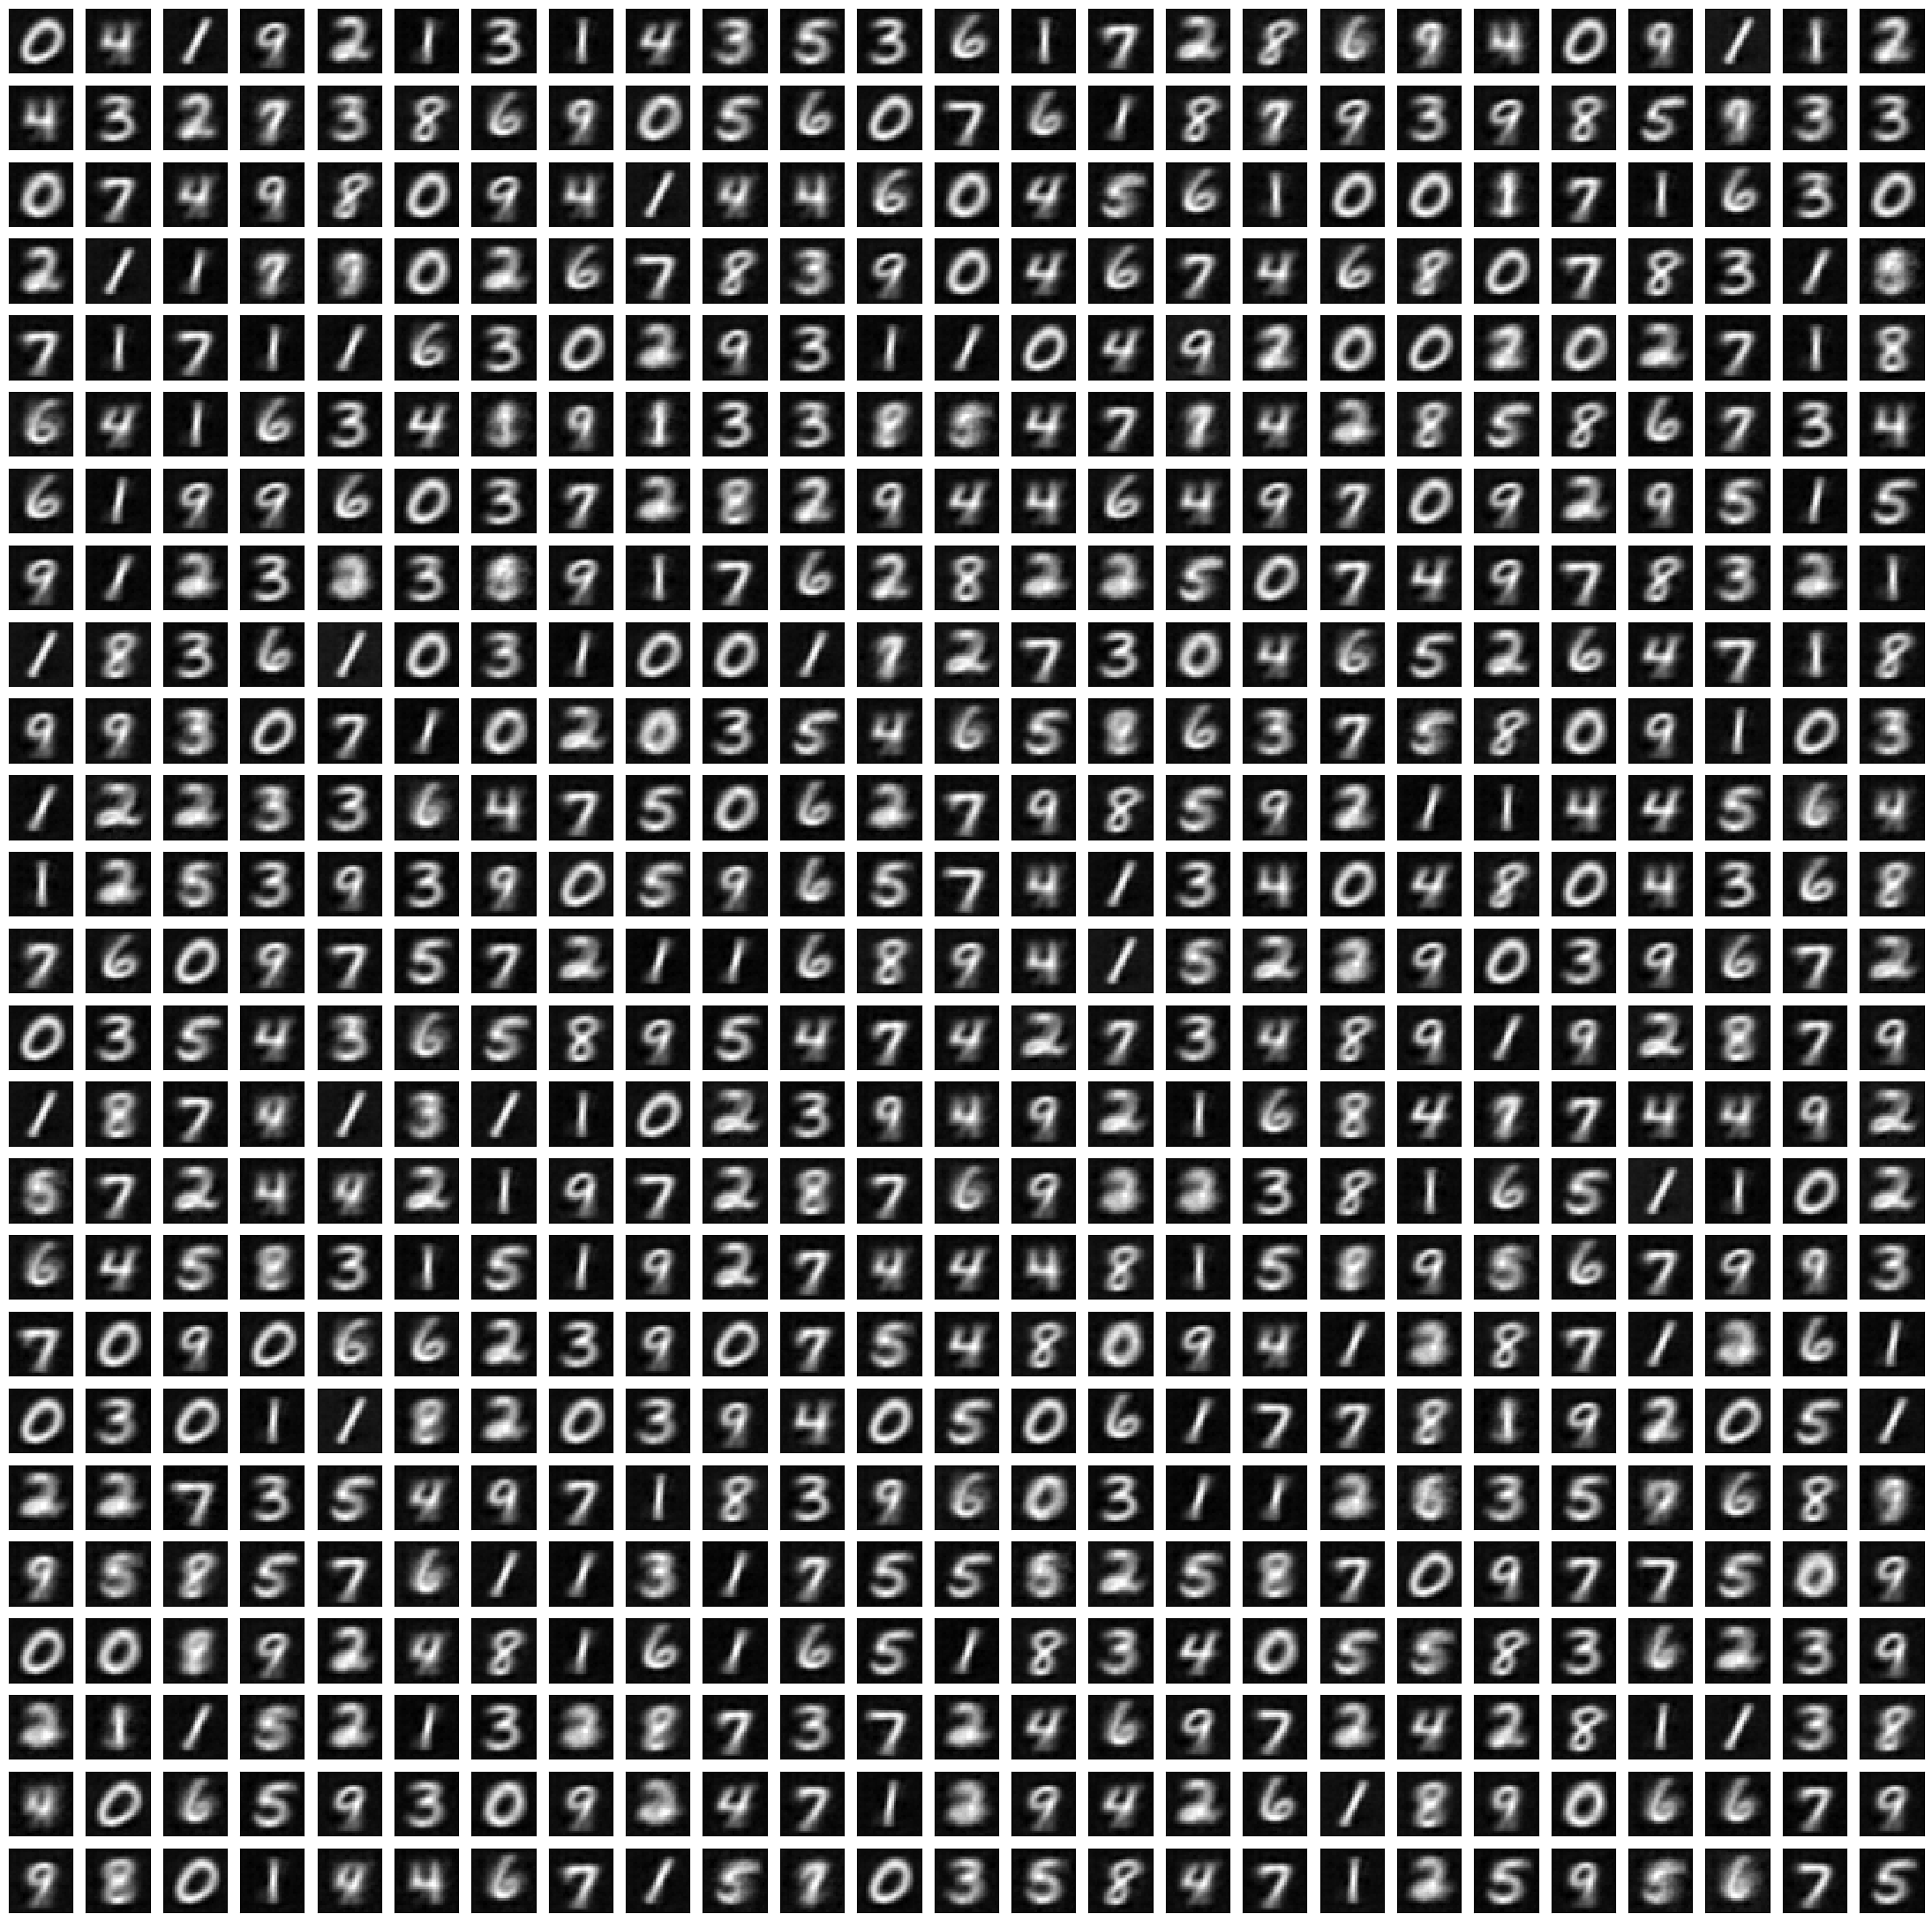

In [ ]:
fig = plt.figure(figsize=(28,28))

decoded_images = decoder.predict(x_proj, verbose=False)

ind = 1
for i in range(1, 26, 1):
    for j in range(1, 26, 1):
        fig.add_subplot(25, 25, ind)
        plt.imshow(decoded_images[ind].reshape((28,28)), cmap = "gray", interpolation = "none")
        plt.xticks([])
        plt.yticks([])
        ind+=1

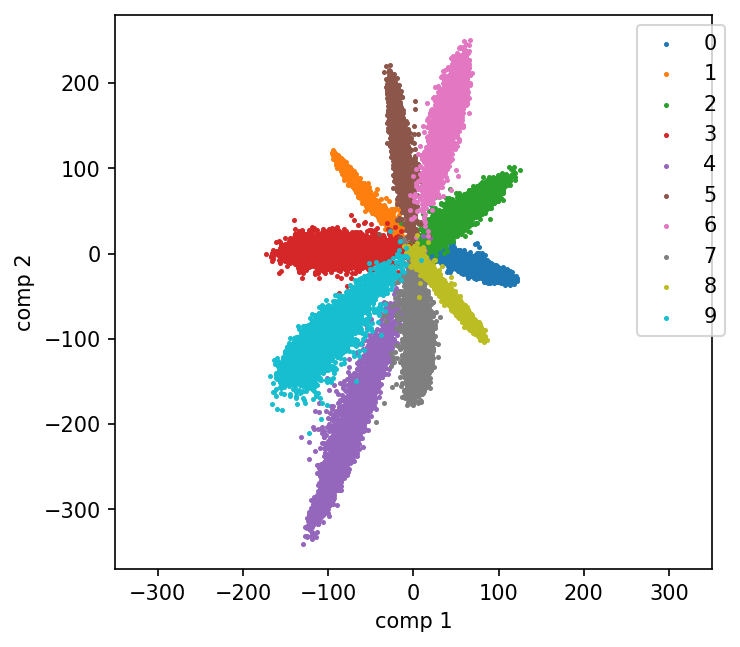

In [ ]:
fig, ax = plt.subplots(dpi=150)

for i in range(10):
    ax.scatter(*x_proj[y_train == i].T, label=i, s=2)


ax.legend(bbox_to_anchor=(1.04, 1))
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_aspect('equal', 'box')
ax.set_xlim(-350,350)

plt.show()

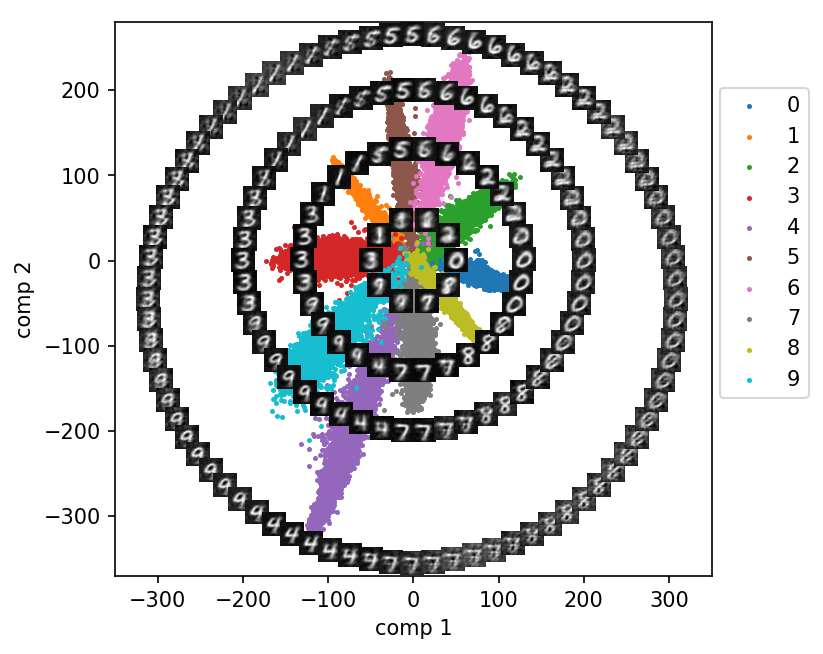

In [ ]:
clear_artists(ax)

circle_path(radius=310, center=(-2, -45), n_images=80, ax=ax)
circle_path(radius=200, center=(0, 0), n_images=50, ax=ax)
circle_path(radius=130, center=(-1, 1), n_images=30, ax=ax)
circle_path(radius=50, center=(0, 0), n_images=10, ax=ax)
ax.legend(bbox_to_anchor=(1.18,0.9))
fig

<font color="green">
Atividade (c) <br>
Se necessário, redefina os valores de [center], [radius] e [n_images] para que as amostras excursionem por toda a distribuição de códigos. Em outras palavras, não deixe nenhuma região colorida sem amostras.
</font>

<font color="green">
Atividade (d) <br>
Qual foi a estratégia adotada para que o código do autoencoder fizesse o desemaranhamento (disentanglement) das classes? É sempre possível adotar esta estratégia ao se treinar um autoencoder?
</font>

**Resposta:**

Para garantir o desemaranhamento das classes no espaço latente do autoencoder, foram adotadas as seguintes estratégias:

1. **Arquitetura Convolucional:** A utilização de uma CNN no autoencoder ajudou a capturar e representar características relevantes presentes nas imagens, facilitando a separação das diferentes classes no espaço latente, como mencionado no item a).

2. **Pré-treinamento do Encoder:** O encoder foi pré-treinado de forma supervisionada para classificar as imagens em suas respectivas classes. Isso ajudou o encoder a aprender uma representação latente onde diferentes classes de dígitos são separadas de maneira clara antes que o decoder tente decodificar o espaço latente.

3. **Pré-treinamento do Decoder:** Após o pré-treinamento do encoder, o decoder foi pré-treinado para mapear essas representações latentes de volta para as imagens, com os pesos do encoder mantidos fixos. Esse treinamento ajudou o decoder a aprender a reconstruir imagens de um espaço latente que já estava organizado em termos de classes.

4. **Treinametno do Autoencoder:** Finalmente, foi realizado um ajuste fino em todo o autoencoder para melhorar a *performance* global do modelo. Esse ajuste permitiu otimizar os pesos tanto do encoder quanto do decoder de maneira conjunta, promovendo uma reconstrução de alta qualidade das imagens e mantendo a separação clara entre as classes no espaço latente.


**Possibilidade de Aplicação:**

Em contextos onde os dados não são rotulados, a utilização de pré-treinamento supervisionado não é possível. Nesses casos, são necessárias outras técnicas para promover o desemaranhamento das classes, como regularizações específicas ou métodos de aprendizado não supervisionado que incentivem a separação das características no espaço latente sem a necessidade de rótulos.